# Sentimen Analisis Clash of Champions oleh Ruangguru

Proyek ini akan melakukan analisis sentimen terhadap tayangan Clash of Champions oleh Ruangguru yang ditayangkan di Youtube

## Install dan Import Library

Karena bahasa-bahasa pada kolom komentar mayoritas Bahasa Indonesia tetapi terdapat beberapa bahasa Inggris, maka akan digunakan library `googletrans` untuk translate seluruh komentar ke bahasa Inggris dan library `sastrawi` untuk preproses komentar berbahasa Indonesia.

In [1]:
!pip install googletrans==3.1.0a0
!pip install sastrawi

Selanjutnya, kita mengimpor seluruh library yang diperlukan pada proyek ini.

In [2]:
import re
import string
import csv
import nltk
import requests
import textblob
import googletrans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from textblob import TextBlob
from googletrans import Translator
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Gathering

Selanjutnya, kita mengimpor dataset yang sudah discrape menjadi file bernama `seluruh_komen.csv`

In [3]:
data = pd.read_csv("/content/seluruh_komen.csv")
data.head(10)

,author,comment
0,@Ruangguru,"Yuk, konsultasi dan klaim diskonnya sekarang d..."
1,@dickyfirmansyah6729,Keren bgt sih ❤
2,@tatokki0927,AAAAHHH SERU BANGETT
3,@nurjannah7090,"Masyaa Alloh Sehat,Semangat,Berkah,Bahagia,Kom..."
4,@ZahraSyafira-hg1il,"saran aja ya, kalo bisa hostnya ngomong full b..."
5,@dfarhazy2333,Keren banget acara ini
6,@SerhatYusuf-o8k,I&#39;m waiting for the weekend they often hav...
7,@YaseminZekeriya,The welcome bonus is a great deal got me start...
8,@TevhidHaci,Check out roulette when you can I’ve had some ...
9,@Turanirem-r7l,What about their referral program? Seems like ...


## Data Preprocessing

Karena data sudah dibersihkan ketika kita melakukan scraping data, maka pada notebook ini, kita akan langsung memproses data agar dapat dianalisa dan dilatih dengan Machine Learning.

In [4]:
# Membuat set berisi seluruh kata-kata tidak baku, typo, maupun slang words
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

# Membuat fungsi untuk memperbaiki kata-kata, mengembalikan hasil berupa kata yang telah diperbaiki
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [5]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # Menghapus RT
    text = re.sub(r"http\S+", '', text) # Menghapus link
    text = re.sub(r'[0-9]+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ') # Mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus semua tanda baca
    text = text.strip(' ') # Menghapus karakter spasi dari kiri dan kanan teks
    return text

# Mengubah semua karakter dalam teks menjadi huruf kecil
def casefoldingText(text):
    text = text.lower()
    return text

# Memecah atau membagi string, teks menjadi daftar token
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Menghapus stopwords dalam teks
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)

    # List stopwords dapat ditambah lagi jika menemukan
    listStopwords.update(["iya", "yaa", "gak", "nya", "na", "sih", "ku", "di",
                          "ga", "ya", "gaa", "loh", "kah", "woi", "woii", "woy",
                          "yuk", "br", "ulm"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = " ".join(stemmed_words)

    return stemmed_text

# Mengubah daftar kata menjadi kalimat
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [6]:
# Membersihkan teks dan menyimpannya di kolom "text_clean"
data["text_clean"] = data["comment"].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di "text_casefoldingText"
data["text_casefoldingText"] = data["text_clean"].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di "text_slangwords"
data["text_slangwords"] = data["text_casefoldingText"].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di "text_tokenizingText"
data["text_tokenizingText"] = data["text_slangwords"].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di "text_stopword"
data["text_stopword"] = data["text_tokenizingText"].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di "text_akhir"
data["text_akhir"] = data["text_stopword"].apply(toSentence)

Selanjutnya, kita akan mengubah bahasa pada komentar menjadi bahasa Inggris seluruhnya.

In [8]:
df = pd.DataFrame(data.text_akhir)

# Memanggil Translator() dari library googletrans
translator = Translator()
translations = {}

# Menerjemahkan komentar
for column in df.columns:
    # Mendapatkan kata-kata unik(hanya ada 1) dari setiap kolom
    unique_elements = df[column].unique()
    for element in unique_elements:
        # Memasukkan terjemahan ke kamus
        translations[element] = translator.translate(element).text

# Memasukkann hasil terjemahan ke kolom baru, yaitu translated_text
data["translated_text"] = df.replace(translations)

data.head(10)

,author,comment,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,translated_text
0,@Ruangguru,"Yuk, konsultasi dan klaim diskonnya sekarang d...",Yuk konsultasi dan klaim diskonnya sekarang di...,yuk konsultasi dan klaim diskonnya sekarang di...,yuk konsultasi dan klaim diskonnya sekarang di...,"[yuk, konsultasi, dan, klaim, diskonnya, sekar...","[konsultasi, klaim, diskonnya, href]",konsultasi klaim diskonnya href,discount claim consultation href
1,@dickyfirmansyah6729,Keren bgt sih ❤,Keren bgt sih,keren bgt sih,keren banget sih,"[keren, banget, sih]","[keren, banget]",keren banget,very cool
2,@tatokki0927,AAAAHHH SERU BANGETT,AAAAHHH SERU BANGETT,aaaahhh seru bangett,aaaahhh seru bangett,"[aaaahhh, seru, bangett]","[aaaahhh, seru, bangett]",aaaahhh seru bangett,aaaahhh that's really exciting
3,@nurjannah7090,"Masyaa Alloh Sehat,Semangat,Berkah,Bahagia,Kom...",Masyaa Alloh SehatSemangatBerkahBahagiaKompak ...,masyaa alloh sehatsemangatberkahbahagiakompak ...,masyaa alloh sehatsemangatberkahbahagiakompak ...,"[masyaa, alloh, sehatsemangatberkahbahagiakomp...","[masyaa, alloh, sehatsemangatberkahbahagiakomp...",masyaa alloh sehatsemangatberkahbahagiakompak ...,"Masha Allah, healthy spirit, blessings, happin..."
4,@ZahraSyafira-hg1il,"saran aja ya, kalo bisa hostnya ngomong full b...",saran aja ya kalo bisa hostnya ngomong full ba...,saran aja ya kalo bisa hostnya ngomong full ba...,saran saja iya kalau bisa hostnya bicara full ...,"[saran, saja, iya, kalau, bisa, hostnya, bicar...","[saran, hostnya, bicara, full, bahasa, indones...",saran hostnya bicara full bahasa indonesia bia...,The host's suggestion is to speak full Indones...
5,@dfarhazy2333,Keren banget acara ini,Keren banget acara ini,keren banget acara ini,keren banget acara ini,"[keren, banget, acara, ini]","[keren, banget, acara]",keren banget acara,very cool event
6,@SerhatYusuf-o8k,I&#39;m waiting for the weekend they often hav...,Im waiting for the weekend they often have spe...,im waiting for the weekend they often have spe...,im waiting for the weekend they often have spe...,"[im, waiting, for, the, weekend, they, often, ...","[im, waiting, weekend, often, special, promos,...",im waiting weekend often special promos wheel ...,im waiting weekend often special promos wheel ...
7,@YaseminZekeriya,The welcome bonus is a great deal got me start...,The welcome bonus is a great deal got me start...,the welcome bonus is a great deal got me start...,the welcome bonus is a great deal got me start...,"[the, welcome, bonus, is, a, great, deal, got,...","[welcome, bonus, great, deal, got, started, ex...",welcome bonus great deal got started extra fun...,welcome bonus great deal got started extra fun...
8,@TevhidHaci,Check out roulette when you can I’ve had some ...,Check out roulette when you can Ive had some l...,check out roulette when you can ive had some l...,check out roulette when you belum ive had some...,"[check, out, roulette, when, you, belum, ive, ...","[check, roulette, ive, luck, especially, night...",check roulette ive luck especially nightly bon...,check roulette ive luck especially nightly bon...
9,@Turanirem-r7l,What about their referral program? Seems like ...,What about their referral program Seems like a...,what about their referral program seems like a...,what about their referral program seems like a...,"[what, about, their, referral, program, seems,...","[referral, program, seems, like, good, deal, g...",referral program seems like good deal get frie...,referral program seems like good deal get frie...


Setelah diproses, selanjutnya kita akan memberi label pada setiap komentar. Pada proyek ini, kita menggunakan polaritas untuk memberikan label pada data. Nilai polaritas memiliki skala dari -1 hingga 1.
* Jika polaritas < 0, maka komentar tersebut bersifat negatif
* Jika polaritas > 0, maka komentar tersebut bersifat positif
* Jika polaritas = 0, maka komentar tersebut bersifat netral

In [9]:
# Mendefinisikan subjektifitas untuk menilai tingkat subjektif pada komentar
def subjektivitas(tr_text):
    return TextBlob(tr_text).sentiment.subjectivity

# Mendefinisikan polaritas untuk menilai tingkat polaritas pada komentar
def polaritas(tr_text):
    return TextBlob(tr_text).sentiment.polarity

# Mendefinisikan hasil sentimen untuk memberikan label pada komentar
def hasilSentimen(nilai):
    if nilai < 0:
        return "negatif"
    elif nilai > 0:
        return "positif"
    else:
        return "netral"

# Menambahkan kolom subjektivitas dengan mengaplikasikan fungsi subjektivitas
data["subjektivitas"] = data["translated_text"].apply(subjektivitas)

# Menambahkan kolom polaritas dengan mengaplikasikan fungsi polaritas
data["polaritas"] = data["translated_text"].apply(polaritas)

# Menambahkan kolom sentimen dengan mengaplikasikan fungsi hasil sentimen
data["sentimen"] = data["polaritas"].apply(hasilSentimen)

# Menampilkan 5 baris pertama data setelah diaplikasikan seluruh fungsi
data.head()

,author,comment,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,translated_text,subjektivitas,polaritas,sentimen
0,@Ruangguru,"Yuk, konsultasi dan klaim diskonnya sekarang d...",Yuk konsultasi dan klaim diskonnya sekarang di...,yuk konsultasi dan klaim diskonnya sekarang di...,yuk konsultasi dan klaim diskonnya sekarang di...,"[yuk, konsultasi, dan, klaim, diskonnya, sekar...","[konsultasi, klaim, diskonnya, href]",konsultasi klaim diskonnya href,discount claim consultation href,0.000000,0.000000,netral
1,@dickyfirmansyah6729,Keren bgt sih ❤,Keren bgt sih,keren bgt sih,keren banget sih,"[keren, banget, sih]","[keren, banget]",keren banget,very cool,0.845000,0.455000,positif
2,@tatokki0927,AAAAHHH SERU BANGETT,AAAAHHH SERU BANGETT,aaaahhh seru bangett,aaaahhh seru bangett,"[aaaahhh, seru, bangett]","[aaaahhh, seru, bangett]",aaaahhh seru bangett,aaaahhh that's really exciting,0.800000,0.300000,positif
3,@nurjannah7090,"Masyaa Alloh Sehat,Semangat,Berkah,Bahagia,Kom...",Masyaa Alloh SehatSemangatBerkahBahagiaKompak ...,masyaa alloh sehatsemangatberkahbahagiakompak ...,masyaa alloh sehatsemangatberkahbahagiakompak ...,"[masyaa, alloh, sehatsemangatberkahbahagiakomp...","[masyaa, alloh, sehatsemangatberkahbahagiakomp...",masyaa alloh sehatsemangatberkahbahagiakompak ...,"Masha Allah, healthy spirit, blessings, happin...",0.350000,0.600000,positif
4,@ZahraSyafira-hg1il,"saran aja ya, kalo bisa hostnya ngomong full b...",saran aja ya kalo bisa hostnya ngomong full ba...,saran aja ya kalo bisa hostnya ngomong full ba...,saran saja iya kalau bisa hostnya bicara full ...,"[saran, saja, iya, kalau, bisa, hostnya, bicar...","[saran, hostnya, bicara, full, bahasa, indones...",saran hostnya bicara full bahasa indonesia bia...,The host's suggestion is to speak full Indones...,0.416667,0.072222,positif


Selanjutnya, kita akan menghitung jumlah masing-masing sentimen dan memvisualisasikannya.

In [10]:
# Menghitung jumlah masing-masing sentimen
data["sentimen"].value_counts()

,count
sentimen,
netral,28977
positif,27414
negatif,7282


Text(0.5, 1.0, 'Persentase Masing-Masing Sentimen')

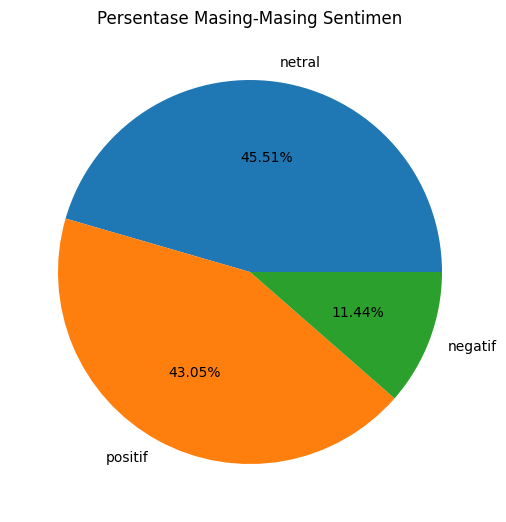

In [11]:
diagram = data["sentimen"].value_counts().rename_axis("nilai_sentimen").reset_index(name = "jumlah")
label = diagram.nilai_sentimen
nilai = diagram.jumlah

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis = ("equal")

# Membentuk pie plot untuk menampilkan persentase masing-masing sentimen
ax.pie(nilai, labels = label, autopct = "%1.2f%%" )
ax.set_title("Persentase Masing-Masing Sentimen")

Dari hasil di atas, dapat dilihat bahwa sentimen positif berjumlah **27414** atau sekitar **43.05%** dari total, sentimen negatif berjumlah **7282** atau sekitar **11.44%** dari total, dan sentimen netral berjumlah **28977** atau sekitar dari **45.51%** total. Selanjutnya, kita akan menyimpan dataset yang telah diberi label.

In [12]:
# Menyimpan dataset yang telah diberi label dalam file csv bernama seluruh_komen_berlabel
data.to_csv("seluruh_komen_berlabel.csv", encoding = "utf8", index = False)

## Data Processing dan Ekstraksi Fitur

Setelah data di preproses, kita akan memproses data untuk pelatihan model machine learning. Karena jumlah komentar negatif jauh lebih sedikit dibanding komentar positif maupun netral, maka kita akan melakukan oversampling data untuk komentar negatif. Pada proyek ini, komentar negatif akan dioversampling sehingga jumlahnya menjadi 28000 baris.

In [13]:
# Mendefinisikan jumlah baris untuk komentar negatif
target_num_negatif = 28000

# Menghitung jumlah baris pada komentar negatif yang ada
current_num_negatif = data[data["sentimen"] == "negatif"].shape[0]

# Menghitung jumlah tambahan baris komentar negatif yang diperlukan
num_additional_negatif = target_num_negatif - current_num_negatif

# Melakukan oversampling pada komentar negatif
additional_negatif_samples = data[data["sentimen"] == "negatif"].sample(num_additional_negatif, replace = True)

# Menggabungkan komentar negatif yang asli dengan komentar negatif hasil oversampling
balanced_data = pd.concat([data, additional_negatif_samples], ignore_index = True)

# Menampilkan jumlah masing-masing sentimen setelah dilakukan oversampling
print(balanced_data["sentimen"].value_counts())

sentimen
netral     28977
negatif    28000
positif    27414
Name: count, dtype: int64


Setelah dilakukan oversampling, terlihat bahwa jumlah data pada masing-masing sentimen sudah berdekatan. Selanjutnya, kita akan melakukan ekstraksi fitur pada dataset menggunakan `TF-IDF`.

In [15]:
# Memisahkan data menjadi fitur (comment) dan label (sentimen)
X = balanced_data["comment"]
y = balanced_data["sentimen"]

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features = 4000, min_df = 20, max_df = 0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns = tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,00,02,05,06,07,08,09,10,100,1000,...,your,youtube,yt,ytb,yu,yuk,yukk,yutub,zaman,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.298709,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
84387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
84388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
84389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Setelah itu, kita akan mempersiapkan data untuk dilatih dengan membagi menjadi dua, yaitu data training dan data testing. Pada proyek ini, sebanyak 80% data masuk ke data traning dan 20% data masuk ke data testing.

In [16]:
# Membagi data menjadi data latih dan data uji dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 50)

## Pemodelan

Setelah data siap untuk dilatih, kita akan memodelkan data menggunakan algoritma Random Forest.

In [17]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Memprediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Mengevaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi data training dan data testing
print("Random Forest - accuracy_train:", accuracy_train_rf)
print("Random Forest - accuracy_test:", accuracy_test_rf)

Random Forest - accuracy_train: 0.9871430264249319
Random Forest - accuracy_test: 0.8828722080691984


Dari hasil di atas, dapat dilihat bahwa model Random Forest memiliki akurasi training sebesar 98.71% dan akurasi testing sebesar 88.28%.

## Inference Function

Kode di bawah ini dapat digunakan untuk menguji model yang telah dibuat dengan output berupa klasifikasi sentimen.

In [18]:
# Mendefinisikan mapping untuk menampilkan output klasifikasi sentimen
label_mapping = {"positif": "Positif", "netral": "Netral", "negatif": "Negatif"}

# Memanggil fungsi Translator dari library googletrans
translator = Translator()

def translate_text(text, bahasa_asal = "id", bahasa_tujuan = "en"):
    """Menerjemahkan bahasa Indonesia menjadi bahasa Inggris"""
    translated = translator.translate(text, src = bahasa_asal, dest = bahasa_tujuan)
    return translated.text

def preprocess_input(text, tfidf_vectorizer):
    """Preprocess the input text to match the training data preprocessing."""
    text_tokenized = word_tokenize(text)
    text_transformed = tfidf_vectorizer.transform([" ".join(text_tokenized)])
    return text_transformed

def predict_sentiment(text, model, tfidf_vectorizer):
    """Predict the sentiment of the given text using the trained Random Forest model."""
    # Menerjemahkan teks input ke dalam bahasa Inggris
    translated_text = translate_text(text)

    # Preproses teks yang telah diterjemahkan
    preprocessed_text = preprocess_input(translated_text, tfidf_vectorizer)

    # Memastikan teks memiliki ukuran yang sesuai
    preprocessed_text_array = preprocessed_text.toarray()

    # Membuat prediksi teks
    prediction = model.predict(preprocessed_text_array)

    # Memprediksi teks ke sentimen yang sesuai
    predicted_sentiment = label_mapping[prediction[0]]

    return predicted_sentiment

# Memberikan input pada pengguna untuk memasukkan teks untuk diuji
input_text = input("Masukkan Teks: ")
predicted_sentiment = predict_sentiment(input_text, random_forest, tfidf)
print(f"Predicted Sentiment: {predicted_sentiment}")

Masukkan Teks: Saya Senang dengan Clash Of Champions
Predicted Sentiment: Positif
